## Explorando los archivos L2

In [1]:
import os
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from netCDF4 import Dataset as netcdf_dataset
import numpy as np

from cartopy import config
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cf 
from datetime import datetime, timedelta
import pandas as pd
from pyproj import Proj
import warnings
warnings.filterwarnings("ignore")
print("librerias ok")

librerias ok


In [8]:
# Ejemplo con 1 sola imagen formato netcdf
# filename = './data/tp_final/grupo_8/raw_data/L2/A2021300181500.L2_LAC_OC.x.nc'
filename = './data/raw_data/L2/A2021300181500.L2_LAC_OC.x.nc'
# Abro el archivo con la libreria netCDF4
dataset = netcdf_dataset(filename)
##Exploramos las carpetas
#print(dataset)
#print(dataset.groups)
# print(dataset.groups['geophysical_data'])
# print(dataset.groups['navigation_data'])

In [9]:
# # Tomo las variables de interes "Clorofila", "Latitud", "Longitud" Para todo su extent
chl = dataset.groups['geophysical_data']['chlor_a'][:]
lon = dataset.groups['navigation_data']['longitude'][:]
lat = dataset.groups['navigation_data']['latitude'][:]

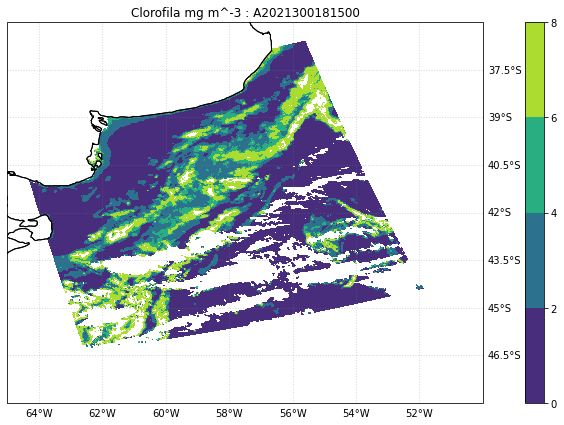

In [15]:
##Graficamos
#%matplotlib
%matplotlib inline
#Plot ARGENTINA
fig = plt.figure(figsize = (15,7))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-50,-65,-36,-48])
im = plt.contourf(lon, lat, chl,levels=[0,2,4,6,8],
             transform=ccrs.PlateCarree())
ax.set_title('Clorofila mg m^-3 : A2021300181500') # Ver bien que titulos poner despues
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.colorbar()
ax.coastlines()
ax.coastlines("10m", zorder=3);
ax.add_feature(cartopy.feature.BORDERS.with_scale("10m"), zorder=3)
gl = ax.gridlines (draw_labels=True, linewidth = 1,color="gray", alpha=0.3, linestyle=":")
gl.left_labels= False 
gl.top_labels = False
plt.show()

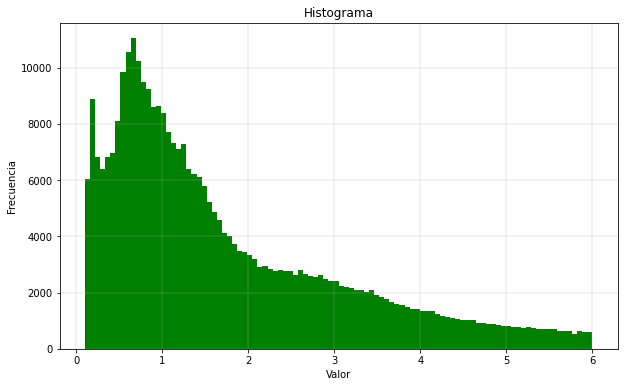

In [22]:
chl[chl==-32767]=np.nan
fig, ax = plt.subplots(figsize=(10,6))
array = chl.ravel()
ax.hist(array, bins=100, range=[0.1,6], color='green')
ax.set_title('Histograma')
ax.set_xlabel('Valor')
ax.set_ylabel('Frecuencia')
ax.grid(linewidth=0.3)
plt.show()

In [23]:
def get_fechas_nc(dir_in, ext='nc', verbose=True):
    
    '''
    extrae la lista ordenada de fechas de los archivos MODIS con formato .nc
    de una carpeta dada por dir_in.
    El resultado es una lista de objetos tipo datetime.
    '''
    
    files = os.listdir(dir_in) #Listado
    # Filtrar únicamente los formatos de datos que me interesan
    files_with_ext = [f for f in files if f.lower().endswith(ext.lower())]
    files_with_ext.sort() #Organizar en orden ascendente
    sfechas = [f.split('.')[0].split('A')[1] for f in files_with_ext] #Extraer las fechas
    
    fechas = [datetime.strptime(f, '%Y%j%H%M%S') for f in sfechas] #Fechas a formato datetime
    
    if verbose: print(f'Se recolectaron {len(fechas)} fechas entre {fechas[0]} y {fechas[-1]}.')
    
    return fechas

# filename = './data/raw_data/L2/A2021300181500.L2_LAC_OC.x.nc'

In [24]:
# dir_in = './data/tp_final/grupo_8/raw_data/L2/'
dir_in = './data/raw_data/L2/' 
fechas = get_fechas_nc(dir_in, ext='nc', verbose=False)
fechas

[datetime.datetime(2021, 10, 1, 17, 35),
 datetime.datetime(2021, 10, 1, 19, 15),
 datetime.datetime(2021, 10, 2, 18, 20),
 datetime.datetime(2021, 10, 3, 17, 25),
 datetime.datetime(2021, 10, 3, 19, 0),
 datetime.datetime(2021, 10, 4, 18, 5),
 datetime.datetime(2021, 10, 5, 18, 50),
 datetime.datetime(2021, 10, 6, 17, 55),
 datetime.datetime(2021, 10, 7, 18, 35),
 datetime.datetime(2021, 10, 7, 18, 40),
 datetime.datetime(2021, 10, 8, 17, 40),
 datetime.datetime(2021, 10, 8, 17, 45),
 datetime.datetime(2021, 10, 8, 19, 20),
 datetime.datetime(2021, 10, 9, 18, 25),
 datetime.datetime(2021, 10, 10, 17, 30),
 datetime.datetime(2021, 10, 10, 19, 10),
 datetime.datetime(2021, 10, 11, 18, 15),
 datetime.datetime(2021, 10, 12, 17, 20),
 datetime.datetime(2021, 10, 12, 18, 55),
 datetime.datetime(2021, 10, 13, 18, 0),
 datetime.datetime(2021, 10, 14, 18, 45),
 datetime.datetime(2021, 10, 15, 17, 50),
 datetime.datetime(2021, 10, 16, 18, 30),
 datetime.datetime(2021, 10, 17, 19, 15),
 datetime

,max,min,mean,std
2021-10-01 17:35:00,14.995968,0.001000,2.095185,2.522534
2021-10-01 19:15:00,14.999063,0.008695,1.854101,2.769338
2021-10-02 18:20:00,14.993544,0.001000,4.105571,3.573129
2021-10-03 17:25:00,14.999990,0.001000,2.305918,2.434817
2021-10-03 19:00:00,14.982575,0.018336,1.185863,2.413741
2021-10-04 18:05:00,14.994646,0.001000,3.321306,3.452936
2021-10-05 18:50:00,14.998931,0.001000,2.614498,3.312519
2021-10-06 17:55:00,14.996741,0.001000,1.751135,2.479075
2021-10-07 18:35:00,NaN,NaN,NaN,NaN
2021-10-07 18:40:00,14.984730,0.184147,2.939782,2.463302


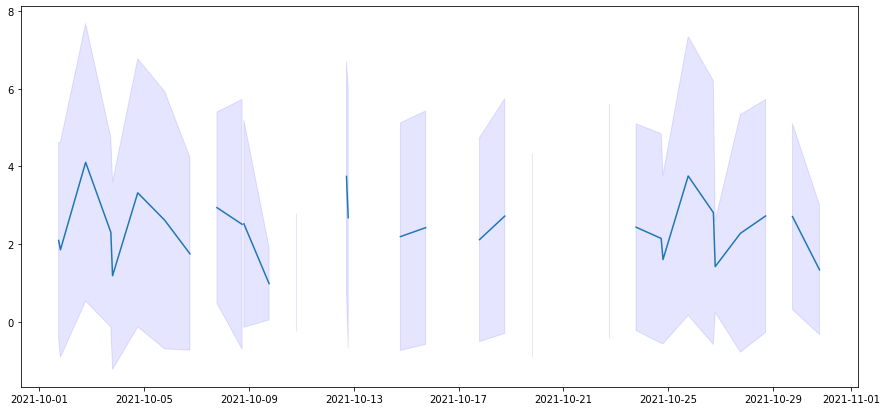

In [26]:
#fname = './data/tp_final/grupo_8/raw_data/L2/'
fname2 = './data/raw_data/L2/' 
warnings.filterwarnings("ignore")
lista_dir = listdir(fname2)
df = pd.DataFrame(index=fechas)
#tomo una caja de 0.1º
latmax = -40 
latmin = -40.01 
lonmax = -60
lonmin =  -60.01 


df['max'] = 0.0
df['min'] = 0.0
df['mean'] = 0.0
df['std'] = 0.0
for i, fecha in enumerate(fechas):
    dataset = netcdf_dataset(fname2+lista_dir[i])
    

    lon = np.array( dataset.groups['navigation_data']['longitude'])
    lat = np.array(dataset.groups['navigation_data']['latitude'])
    lonindex = np.where((lon >= lonmin) & (lon <= lonmax))
    latindex = np.where((lat >= latmin) & (lat <= latmax))
    #print(i, len(latindex[0]), len(lonindex[0]))
#     print(i)
    if len(latindex[0] !=0) and len(lonindex[0] !=0):
            
        lon = np.array(lon[lonindex])
        lat = np.array(lat[latindex])

        minlati = np.min(latindex)
        maxlati = np.max(latindex)
        #print("imprimiendo if")
        minloni = np.min(lonindex)
        maxloni = np.max(lonindex)
        chl = np.array(dataset.groups['geophysical_data']['chlor_a'])[minlati:maxlati, minloni:maxloni]
        lon = np.array(dataset.groups['navigation_data']['longitude'])[minlati:maxlati, minloni:maxloni]
        lat = np.array(dataset.groups['navigation_data']['latitude'])[minlati:maxlati, minloni:maxloni]
        #5>4
        
        array = chl.ravel()
        array[array== -32767] = np.nan
        array[array>15] = np.nan # ver esto!! dan valores muy altos 
        array = array[~np.isnan(array)]
        df.loc[fecha,'max'] = array.max()
        df.loc[fecha,'min'] = array.min()
        df.loc[fecha,'mean'] = array.mean()
        df.loc[fecha,'std'] = array.std()
       
    else:
        #print("else")
        df.loc[fecha,'max'] =  np.nan
        df.loc[fecha,'min'] = np.nan
        df.loc[fecha,'mean'] = np.nan
        df.loc[fecha,'std'] = np.nan
        
#Agregamos un desvío estandar 
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
media_clase = df['mean'].values
std_clase = df['std'].values
ci = std_clase
ax.plot(fechas,media_clase)
ax.fill_between(fechas,media_clase-ci,(media_clase+ci), color='b', alpha=.1)
       
df

## Muchas Nubes... probemos con el L3... 8 day
